# Code from the article "Closed Saddle Connections on the Dodecahedron" by Jayadev Athreya, David Aulicino, and W. Patrick Hooper

## Code from &sect;6: Unfoldings of the Platonic solids

In [1]:
def build_adj_oct(sheet, triangle):
    i = sheet;
    oct_adj_base = 8*[None]
    oct_adj_base[0] = [(i-1,7),(i,3),(i,1)]
    oct_adj_base[1] = [(i-1,6),(i,4),(i,0)]
    oct_adj_base[2] = [(i,7),(i,5),(i,3)]
    oct_adj_base[3] = [(i+1,6),(i,0),(i,2)]
    oct_adj_base[4] = [(i+1,7),(i,1),(i,5)]
    oct_adj_base[5] = [(i,6),(i,2),(i,4)]
    oct_adj_base[6] = [(i,5),(i+1,1),(i-1,3)]
    oct_adj_base[7] = [(i,2),(i+1,0),(i-1,4)]
    prelim_adj = [oct_adj_base[triangle%8][(k-i)%3] for k in range(3)]
    return [[item[0]%3, item[1]%8] for item in prelim_adj]

def build_adj_cube(sheet, square):
    i = sheet;
    cube_adj_base = 6*[None]
    cube_adj_base[0] = [(i-1,4), (i,1), (i+1,5), (i,3)]
    cube_adj_base[1] = [(i,4), (i,2), (i,5), (i,0)]
    cube_adj_base[2] = [(i+1,4), (i,3), (i-1,5), (i,1)]
    cube_adj_base[3] = [(i+2,4), (i,0), (i+2,5), (i,2)]
    cube_adj_base[4] = [(i+2,3), (i-1,2), (i,1), (i+1,0)]
    cube_adj_base[5] = [(i,1), (i+1,2), (i+2,3), (i+3,0)]
    prelim_adj = [cube_adj_base[square%6][(k-i)%4] for k in range(4)]
    return [[item[0]%4, item[1]%6] for item in prelim_adj]

def build_adj_icosa(sheet, triangle):
    i = sheet;
    icos_adj_base = 20*[None]
    icos_adj_base[0] = [(i,19),(i,3),(i,1)]
    icos_adj_base[1] = [(i,18),(i,8),(i,0)]
    icos_adj_base[2] = [(i,17),(i,5),(i,3)]
    icos_adj_base[3] = [(i,16),(i,0),(i,2)]
    icos_adj_base[4] = [(i,15),(i,7),(i,5)]
    icos_adj_base[5] = [(i,14),(i,2),(i,4)]
    icos_adj_base[6] = [(i,13),(i,9),(i,7)]
    icos_adj_base[7] = [(i,12),(i,4),(i,6)]
    icos_adj_base[8] = [(i,11),(i,1),(i,9)]
    icos_adj_base[9] = [(i,10),(i,6),(i,8)]
    icos_adj_base[10] = [(i,9),(i-1,18),(i+1,12)]
    icos_adj_base[11] = [(i,8),(i-1,13),(i+1,19)]
    icos_adj_base[12] = [(i,7),(i-1,10),(i+1,14)]
    icos_adj_base[13] = [(i,6),(i-1,15),(i+1,11)]
    icos_adj_base[14] = [(i,5),(i-1,12),(i+1,16)]
    icos_adj_base[15] = [(i,4),(i-1,17),(i+1,13)]
    icos_adj_base[16] = [(i,3),(i-1,14),(i+1,18)]
    icos_adj_base[17] = [(i,2),(i-1,19),(i+1,15)]
    icos_adj_base[18] = [(i,1),(i-1,16),(i+1,10)]
    icos_adj_base[19] = [(i,0),(i-1,11),(i+1,17)]
    prelim_adj = [icos_adj_base[triangle%20][(k+2*i)%3] for k in range(3)]
    return [[item[0]%6, item[1]%20] for item in prelim_adj]

def build_adj_dodec(sheet, pent): #explains how all 120 pentagons are glued together
    #sheet is between 0 and 9
    #pent is between 0 and 11
    i = sheet;
    # To define the adjacencies of pentagons, we take i = 1 or 2 depending on which
    # puts it in the position of horizontal edge on bottom
    # Then a rotation of the lists will give the correct identification
    # The place in this list is the pentagon, but it needs to be rotated by j
    # creating a list of list of tuples
    #pentagons in the net labeled, left flower has horizontal bottom = F_0, below it is F_1, counterclockwise around for F_2,..,F_5
    #F_6 is center of other flower, F_7 above it, counterclockwise around for F_8, ..., F_11.
    dodec_adj_base = 12*[None] #initializing list of adjacencies
    dodec_adj_base[0] = [(i,1),(i,2),(i,3),(i,4),(i,5)] #adjacencies of F_0
    dodec_adj_base[1] = [(i,0),(i+1,5),(i+4,10),(i-4,9),(i-1,2)] #adjacencies of F_1
    dodec_adj_base[2] = [(i-1,3),(i,0),(i+1,1),(i-2,9),(i,8)] #adjacencies of F_2
    dodec_adj_base[3] = [(i+4,7),(i-1,4),(i,0),(i+1,2),(i+2,8)] #adjacencies of F_3
    dodec_adj_base[4] = [(i-4,7),(i-2,11),(i-1,5),(i,0),(i+1,3)] #adjacencies of F_4
    dodec_adj_base[5] = [(i+1,4),(i,11),(i+2,10),(i-1,1),(i,0)] #adjacencies of F_5
    dodec_adj_base[6] = [(i,7),(i,8),(i,9),(i,10),(i,11)] #adjacencies of F_6
    dodec_adj_base[7] = [(i,6),(i+1,11),(i+4,4),(i-4,3),(i-1,8)] #adjacencies of F_7
    dodec_adj_base[8] = [(i-1,9),(i,6),(i+1,7),(i-2,3),(i,2)] #adjacencies of F_8
    dodec_adj_base[9] = [(i+4,1),(i-1,10),(i,6),(i+1,8),(i+2,2)] #adjacencies of F_9
    dodec_adj_base[10] = [(i-4,1),(i-2,5),(i-1,11),(i,6),(i+1,9)] #adjacencies of F_10
    dodec_adj_base[11] = [(i+1,10),(i,5),(i+2,4),(i-1,7),(i,6)] #adjacencies of F_11
    prelim_adj = [dodec_adj_base[pent%12][(k+2*i)%5] for k in range(5)]
    return [[item[0]%10, item[1]%12] for item in prelim_adj]

In [2]:
import itertools

# These are for the Platonic solids with odd polygon faces to construct the base surface

def double_triangle_oct_top(): # gives the list of all triangles with horizontal base
    return list(itertools.product(*[range(3), range(0,8,2)]))

def double_triangles_oct():
    return [[list(top),build_adj_oct(top[0],top[1])[0]] for top in double_triangle_oct_top()]

def squares():
    return list(itertools.product(*[range(4), range(6)]))

def double_triangle_top(): # gives the list of all triangles with horizontal base
    odd_array = [range(1,6,2), range(1,20,2)]
    even_array = [range(0,6,2), range(0,20,2)]
    return list(itertools.product(*odd_array)) + list(itertools.product(*even_array))

def double_triangles():
    return [[list(top),build_adj_icosa(top[0],top[1])[0]] for top in double_triangle_top()]

def double_pent_top(): # gives the list of all pentagons with horizontal base
    odd_array = [range(1,10,2), range(7,12) + [0]]
    even_array = [range(0,9,2), range(1,7)]
    return list(itertools.product(*odd_array)) + list(itertools.product(*even_array))

def double_pent(): # gives list of 60 double pentagons
    return [[top,build_adj_dodec(top[0],top[1])[4]] for top in double_pent_top()]

In [3]:
def perm_sq(abcd):
    #This only gives useful information for abcd = 1 or 2
    sq_list = squares()
    total = []
    i = 0
    perm_a_sub = []
    perm_a = []
    while len(total) < 20:
        total += perm_a_sub
        total.sort()
        if len(total) != 0:
            i_list = [j for j in range(len(total)) if j != total[j]]
            if i_list == []:
                i = len(total)
            else:
                i = i_list[0]
        perm_a_sub = []
        while i not in perm_a_sub:
            perm_a_sub += [i]
            i = sq_list.index(tuple(build_adj_cube(sq_list[i][0], sq_list[i][1])[abcd]))
        perm_a.append(tuple(perm_a_sub))
    return perm_a

def perm_odd(plat_solid, abcd, top_list, double_list, upper_limit = 55):
    bot_list = [tri[1] for tri in double_list]
    total = []
    i = 0
    perm_a_sub = []
    perm_a = []
    while len(total) < upper_limit:
        total += perm_a_sub
        total.sort()
        if len(total) != 0:
            i_list = [j for j in range(len(total)) if j != total[j]]
            if i_list == []:
                i = len(total)
            else:
                i = i_list[0]
        perm_a_sub = []
        while i not in perm_a_sub:
            perm_a_sub += [i]
            if plat_solid == 5:
                i = bot_list.index(build_adj_dodec(top_list[i][0],top_list[i][1])[abcd])
            elif plat_solid == 4:
                i = bot_list.index(build_adj_icosa(top_list[i][0],top_list[i][1])[abcd])
            elif plat_solid == 3:
                i = bot_list.index(build_adj_oct(top_list[i][0],top_list[i][1])[abcd])
        perm_a.append(tuple(perm_a_sub))
    return perm_a

# Code from &sect;7: The Arithmetic Platonic Solids

In [4]:
from surface_dynamics.all import *

def zer_to_60(perm,t=60):
    '''
    This replaces the 0 in the permutation with t
    It addresses the issue that permutations take values in the natural numbers
    '''
    return [tuple([t if j==0 else j for j in tup]) if 0 in tup else tup for tup in perm];

In [5]:
#Monodromy permutations for the octahedron
show(perm_odd(3,1,double_triangle_oct_top(),double_triangles_oct(),9))
show(perm_odd(3,2,double_triangle_oct_top(),double_triangles_oct(),9))
oct_perm_0 = zer_to_60(perm_odd(3,1,double_triangle_oct_top(),double_triangles_oct(),9),12)
oct_perm_1 = zer_to_60(perm_odd(3,2,double_triangle_oct_top(),double_triangles_oct(),9),12)
octahedron = Origami(oct_perm_0, oct_perm_1)
H_octa = octahedron.veech_group()

[(0, 7, 6), (1, 3, 4), (2, 11, 5), (8, 10, 9)]

[(0, 11, 9), (1, 7, 10), (2, 3, 8), (4, 5, 6)]

In [6]:
#Monodromy permutations for the cube
show(perm_sq(0))
show(perm_sq(1))
cube_perm_0 = zer_to_60(perm_sq(0),24)
cube_perm_1 = zer_to_60(perm_sq(1),24)
cube = Origami(cube_perm_0, cube_perm_1)
H_cube = cube.veech_group()

[(0, 22, 14, 11),
 (1, 4, 15, 5),
 (2, 10, 12, 23),
 (3, 16, 13, 17),
 (6, 9, 8, 7),
 (18, 19, 20, 21)]

[(0, 1, 2, 3),
 (4, 20, 17, 6),
 (5, 8, 16, 18),
 (7, 10, 21, 11),
 (9, 22, 19, 23),
 (12, 15, 14, 13)]

In [7]:
#Monodromy permutations for the icosahedron
print(perm_odd(4, 1, double_triangle_top(), double_triangles()))
print(perm_odd(4, 2, double_triangle_top(), double_triangles()))
icos_perm_0 = zer_to_60(perm_odd(4, 1, double_triangle_top(), double_triangles()))
icos_perm_1 = zer_to_60(perm_odd(4, 2, double_triangle_top(), double_triangles()))
icosahedron = Origami(icos_perm_0, icos_perm_1)
H_icos = icosahedron.veech_group()

[(0, 45, 13, 17, 9), (1, 49, 14, 16, 8), (2, 48, 10, 15, 7), (3, 47, 11, 19, 6), (4, 46, 12, 18, 5), (20, 21, 22, 23, 24), (25, 30, 38, 56, 53), (26, 34, 39, 57, 52), (27, 33, 35, 58, 51), (28, 32, 36, 59, 50), (29, 31, 37, 55, 54), (40, 44, 43, 42, 41)]
[(0, 4, 3, 2, 1), (5, 33, 36, 48, 40), (6, 32, 37, 49, 44), (7, 31, 38, 45, 43), (8, 30, 39, 46, 42), (9, 34, 35, 47, 41), (10, 19, 27, 23, 55), (11, 18, 26, 24, 59), (12, 17, 25, 20, 58), (13, 16, 29, 21, 57), (14, 15, 28, 22, 56), (50, 51, 52, 53, 54)]


Proof for the Octahedron:
Number of Cusps = 2
Slope 1 yields cylinders given by a permutation that is a product of 2-cycles:


(1,8)(2,9)(3,5)(4,7)(6,11)(10,12)

Vertical yields cylinders given by a permutation that is a product of 3-cycles.


(1,7,10)(2,3,8)(4,5,6)(9,12,11)

Both directions are distinct periodic directions.  No zero appears twice in any square.


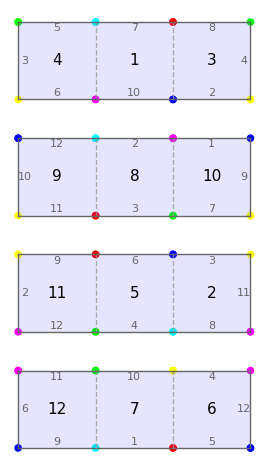

In [8]:
print('Proof for the Octahedron:')
print('Number of Cusps = ' + str(len(H_octa.cusps())))
print('Slope 1 yields cylinders given by a permutation that is a product of 2-cycles:')
show(PermutationGroupElement(oct_perm_0)*PermutationGroupElement(oct_perm_1))
print('Vertical yields cylinders given by a permutation that is a product of 3-cycles.')
show(PermutationGroupElement(oct_perm_1))
print('Both directions are distinct periodic directions.  No zero appears twice in any square.')
octahedron.show()

Proof for the cube:
Number of Cusps = 3
Vertical yields cylinders given by a permutation that is a product of 4-cycles.


(1,2,3,24)(4,20,17,6)(5,8,16,18)(7,10,21,11)(9,22,19,23)(12,15,14,13)


Slope 1 yields cylinders given by a permutation that is a product of 3-cycles.


(1,20,11)(2,21,5)(3,18,23)(4,14,7)(6,22,13)(8,10,15)(9,16,12)(17,24,19)


Slope 2 yields cylinders given by a permutation that is a product of 2-cycles.


(1,14)(2,15)(3,12)(4,8)(5,20)(6,16)(7,22)(9,10)(11,19)(13,24)(17,18)(21,23)


All 3 directions are distinct periodic directions.  No zero appears on both the top and bottom of any cylinder.


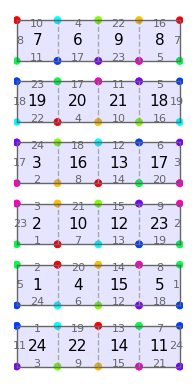

In [9]:
print('Proof for the cube:')
print('Number of Cusps = ' + str(len(H_cube.cusps())))
print('Vertical yields cylinders given by a permutation that is a product of 4-cycles.')
show(PermutationGroupElement(cube_perm_1))
print('\n'+'Slope 1 yields cylinders given by a permutation that is a product of 3-cycles.')
show(PermutationGroupElement(cube_perm_0)*PermutationGroupElement(cube_perm_1))
print('\n'+'Slope 2 yields cylinders given by a permutation that is a product of 2-cycles.')
show(PermutationGroupElement(cube_perm_0)*PermutationGroupElement(cube_perm_0)*PermutationGroupElement(cube_perm_1))
print('\n'+'All 3 directions are distinct periodic directions.  No zero appears on both the top and bottom of any cylinder.')
cube.show()

Proof for the Icosahedron:
Number of Cusps = 3
Vertical yields cylinders given by a permutation that is a product of 5-cycles.


(1,60,4,3,2)(5,33,36,48,40)(6,32,37,49,44)(7,31,38,45,43)(8,30,39,46,42)(9,34,35,47,41)(10,19,27,23,55)(11,18,26,24,59)(12,17,25,20,58)(13,16,29,21,57)(14,15,28,22,56)(50,51,52,53,54)


Slope 1/3 yields cylinders given by a permutation that is a product of 3-cycles.


(1,29,10)(2,28,11)(3,27,12)(4,26,13)(5,17,43)(6,18,42)(7,19,41)(8,15,40)(9,16,44)(14,60,25)(20,55,38)(21,59,37)(22,58,36)(23,57,35)(24,56,39)(30,54,49)(31,50,48)(32,51,47)(33,52,46)(34,53,45)


Slope 1/2 yields cylinders given by a permutation that is a product of 2-cycles.


(1,15)(2,19)(3,18)(4,17)(5,42)(6,41)(7,40)(8,44)(9,43)(10,31)(11,32)(12,33)(13,34)(14,30)(16,60)(20,56)(21,55)(22,59)(23,58)(24,57)(25,45)(26,46)(27,47)(28,48)(29,49)(35,52)(36,51)(37,50)(38,54)(39,53)


All 3 directions are distinct periodic directions.  No zero appears on both the top and bottom of any cylinder.


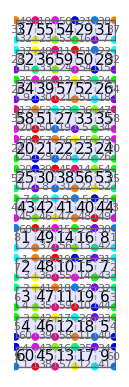

In [10]:
print('Proof for the Icosahedron:')
print('Number of Cusps = ' + str(len(H_icos.cusps())))
print('Vertical yields cylinders given by a permutation that is a product of 5-cycles.')
show(PermutationGroupElement(icos_perm_1))
print('\n'+'Slope 1/3 yields cylinders given by a permutation that is a product of 3-cycles.')
show(PermutationGroupElement(icos_perm_0)*PermutationGroupElement(icos_perm_0)*PermutationGroupElement(icos_perm_0)*PermutationGroupElement(icos_perm_1))
print('\n'+'Slope 1/2 yields cylinders given by a permutation that is a product of 2-cycles.')
show(PermutationGroupElement(icos_perm_0)*PermutationGroupElement(icos_perm_0)*PermutationGroupElement(icos_perm_1))
print('\n'+'All 3 directions are distinct periodic directions.  No zero appears on both the top and bottom of any cylinder.')
icosahedron.show()

# Code from $\S$ 7.2

In [11]:
H_octa = octahedron.veech_group()
H_cube = cube.veech_group()
H_icos = icosahedron.veech_group()
Arith_Plat_Solids = [(H_octa,'Octahedron'), (H_cube,'Cube'), (H_icos,'Icosahedron')]

In [12]:
for i in range(3):
    H_plat = Arith_Plat_Solids[i][0]
    print(Arith_Plat_Solids[i][1])
    print(H_plat.index()) #index in SL(2, Z)
    print(H_plat.cusps()) #list of cusps
    print([H_plat.cusp_width(cusp) for cusp in H_plat.cusps()])
    print(H_plat.nu2()) #Number of orbifold points of order 2
    print(H_plat.nu3()) #Number of orbifold points of order 3
    print(H_plat.genus())
    print('\n')

Octahedron
4
[Infinity, 1]
[3, 1]
0
1
0


Cube
9
[Infinity, 2, 3]
[4, 2, 3]
1
0
0


Icosahedron
10
[Infinity, 1/2, 1]
[5, 2, 3]
0
1
0




## Code from $\S$9: The dodecahedron unfolding

You need a recent version of FlatSurf to run this code. Directions to install FlatSurf are here: <a href="https://github.com/videlec/sage-flatsurf">https://github.com/videlec/sage-flatsurf</a>

Load the 'flatsurf' package:

In [13]:
from flatsurf import *

Define $F={\mathbb Q}(s)$ where $s=2 \sin \frac{\pi}{5}$

In [14]:
s_AA = AA(2*sin(pi/5))
F.<s> = NumberField(s_AA.minpoly(), embedding=s_AA)
show(F)
show(s.n())

Number Field in s with defining polynomial x^4 - 5*x^2 + 5 with s = 1.175570504584947?

1.17557050458495

The top and bottom pentagons with side length two:

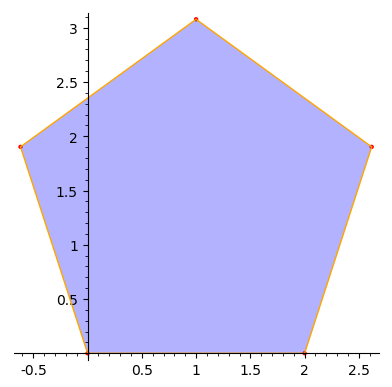

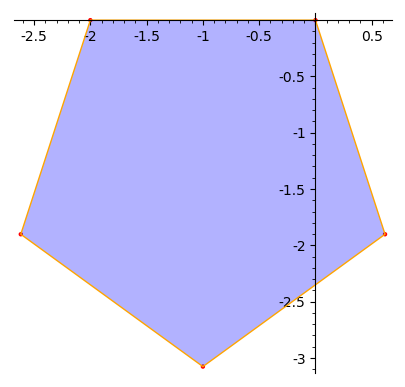

In [15]:
pentagon_top = 2 * polygons.regular_ngon(5, field=F)
pentagon_bottom = (-1) * pentagon_top
show(pentagon_top.plot())
show(pentagon_bottom.plot())

Matrices in the Veech group of the double pentagon:

In [16]:
R = Matrix(F, [[ cos(pi/5), -sin(pi/5) ],
               [ sin(pi/5),  cos(pi/5) ]] )
show("R=", R)
T = Matrix(F, [[ 1, 2*cot(pi/5) ],
               [ 0,           1 ]] )
show("T=", T)
J = Matrix(F, [[ 1,  0 ],
               [ 0, -1 ]] )
show("J=", J)

'R=' [-1/2*s^2 + 3/2         -1/2*s]
[         1/2*s -1/2*s^2 + 3/2]

'T=' [             1 -6/5*s^3 + 4*s]
[             0              1]

'J=' [ 1  0]
[ 0 -1]

We will build a surface `Dtilde` with vertices in $F^2$:

In [17]:
S = Surface_dict(F)

Add the pentagon with labels given by `(sheet, pent)`. The pentagons will be either top or bottom and this can be decided by looking at the list generated by `double_pent_top()`.

In [18]:
top_indices = double_pent_top()
for sheet in range(10):
    for pent in range(12):
        if (sheet, pent) in top_indices:
            S.add_polygon(pentagon_top, label=(sheet,pent))
        else:
            S.add_polygon(pentagon_bottom, label=(sheet,pent))

Declare a base label.

In [19]:
S.change_base_label((0,0))

Glue the edges of the polygons as specified by `build_adj_dodec`:

In [20]:
for sheet in range(10):
    for pent in range(12):
        adj = build_adj_dodec(sheet,pent)
        for edge in range(5):
            S.change_edge_gluing((sheet,pent), edge, tuple(adj[edge]), edge)

Make it so the surface can no longer be changed:

In [21]:
S.set_immutable()

Declare `Dtilde` to be the translation surface based on `S`.

In [22]:
Dtilde = TranslationSurface(S)
# The following line would print an error message if S 
# does not define a translation surface.
TestSuite(Dtilde).run()

The following code computes the permutations `r` and `t`. <em>Warning: This code takes a long time to run: about 24 hours on a fast computer.</e>

In [23]:
# Change the following to True to actually run the code.
run_the_code = False

if run_the_code:
    # This is for a progress indicator.
    import sys
    progress = 0
    from datetime import datetime
    start = datetime.now()
    count = 0
    
    gens = [(R,'R'), (T,'T')] 
    for gen,letter in gens:
        gen.set_immutable()
    gens_action = {gen:{} for gen,letter in gens} 
    Dtilde_canonicalized = Dtilde.canonicalize()
    leaves = [Dtilde_canonicalized]
    surface_to_index = {Dtilde_canonicalized: 1}
    w = {1: ''}
    while len(leaves)>0: 
        old_leaves = leaves
        leaves = []
        for leaf in old_leaves:
            count += 1
            leaf_index = surface_to_index[leaf]
            for gen, letter in gens:
                image_surface = (gen*leaf).canonicalize()
                if image_surface in surface_to_index:
                    image_index = surface_to_index[image_surface]
                else:
                    image_index = len(surface_to_index)+1
                    surface_to_index[image_surface] = image_index
                    leaves.append(image_surface)
                    w[image_index] = letter + w[leaf_index]
                gens_action[gen][leaf_index] = image_index
            if progress < floor(100*count/2106):
                # Give some feedback on progress made.
                progress = floor(100*count/2106)
                current = datetime.now()
                change = (current - start).total_seconds()
                expected = change*(2106 - count)/count
                print str(progress) + "% complete (" + str(floor(expected)) +" seconds remaining)",
                sys.stdout.flush()
    N = len(surface_to_index)
    r = Permutation( [ gens_action[R][i] for i in range(1,N+1) ] )
    t = Permutation( [ gens_action[T][i] for i in range(1,N+1) ] )
else:
    # Just the answer:
    N = 2106

    # Read the permuation r from a file:
    f = open("r_permutation.txt", "r")
    r = Permutation(eval(f.readline()))
    f.close()

    # Read the permuation t from a file:
    f = open("t_permutation.txt", "r")
    t = Permutation(eval(f.readline()))
    f.close()
    
    # Read the dictionary w from a file.
    f = open("dodecahedron_words.txt", "r")
    w = eval(f.readline())
    f.close()

As a sanity check, we observe that the words in the dictionary `w` are ordered as claimed by Remark 9.3 of the paper.

In [24]:
# This function compares two words in the ordering described
# in Remark 9.3.
def compare_words(w1,w2):
    # return -1 if w1 < w2
    # return 0 if w1 = w2
    # return 1 if w1 > w2.
    if len(w1) < len(w2):
        return -1
    if len(w1) > len(w2):
        return 1
    # The words have equal length.
    # Now we compare the letters in reverse order.
    for i in range(1, len(w1)+1):
        if w1[-i] < w2[-i]:
            return -1
        if w1[-i] > w2[-i]:
            return 1
    # All letters match.
    return 0

# Now we check the ordering.
for i in range(1, N+1):
    for j in range(i+1, N+1):
        assert compare_words(w[i],w[j])==-1

The following code computes the permuation `j`.

In [25]:
rinv = ~r  # The inverse permuation of r
tinv = ~t  # The inverse permuation of t
def index_of_phi_of_word(word):
    # Given a word in the letters "R" and "T", this function computes
    # the surface index of the surface phi(word)(tildeD).
    index = 1
    for letter in reversed(word):
        if letter == "R":
            index = rinv(index)
        elif letter == "T":
            index = tinv(index)
    return index
j = Permutation([index_of_phi_of_word(w[i]) for i in range(1,2107)])

The following code computes `wordlist` which contains one word representing each $\langle T,J\rangle$ orbit in $V_+(P)(\tilde D)$.

In [26]:
equiv = {i:{i} for i in xrange(1,2107)}
for index1 in xrange(1,2107):
    index2 = t(index1)
    for index3 in equiv[index2]:
        equiv[index1].add(index3)
        equiv[index3] = equiv[index1]
    index2 = j(index1)
    for index3 in equiv[index2]:
        equiv[index1].add(index3)
        equiv[index3] = equiv[index1]
equivalence_classes = { frozenset(equiv[i]) for i in xrange(1,2107) }
indexlist = [min(eqclass) for eqclass in equivalence_classes]
indexlist.sort()
wordlist = [w[i] for i in indexlist]
coset_reps = wordlist
show(coset_reps)

['',
 'RT',
 'RRT',
 'RTT',
 'RTRT',
 'RRTT',
 'RTTT',
 'RTRRT',
 'RRTRT',
 'RTTRT',
 'RRRTT',
 'RTRTT',
 'RRTTT',
 'RTTRRT',
 'RTRTRT',
 'RRTTRT',
 'RTTTRT',
 'RTRRTT',
 'RRTRTT',
 'RTTRTT',
 'RRRTTT',
 'RTRTTT',
 'RRTTTT',
 'RTTTTT',
 'RTTRRRT',
 'RTRTRRT',
 'RRTTRRT',
 'RTRRTRT',
 'RRTRTRT',
 'RTRTTRT',
 'RRTTTRT',
 'RTTTTRT',
 'RTRRRTT',
 'RRTRRTT',
 'RTTRRTT',
 'RRRTRTT',
 'RTRTRTT',
 'RRTTRTT',
 'RTTTRTT',
 'RTRRTTT',
 'RTTRTTT',
 'RRTTTTT',
 'RTTTTTT',
 'RRTTRRRT',
 'RTTTRRRT',
 'RTRRTRRT',
 'RRRTTRRT',
 'RTTRRTRT',
 'RTRTRTRT',
 'RRTTRTRT',
 'RTTTRTRT',
 'RTRRTTRT',
 'RRTRTTRT',
 'RRRTTTRT',
 'RTRTTTRT',
 'RRTTTTRT',
 'RTTRRRTT',
 'RTRTRRTT',
 'RRTTRRTT',
 'RTTRTRTT',
 'RRRTTRTT',
 'RTRTTRTT',
 'RRTTTRTT',
 'RTTTTRTT',
 'RRTRRTTT',
 'RTTRRTTT',
 'RRTRTTTT',
 'RRRTTTTT',
 'RRTTTTTT',
 'RTTTTTTT',
 'RTRTTRRRT',
 'RRTTTRRRT',
 'RTRTRTRRT',
 'RTRTRRTRT',
 'RRTTRRTRT',
 'RRTRTRTRT',
 'RTTRTRTRT',
 'RTRRRTTRT',
 'RRTRRTTRT',
 'RTRTRTTRT',
 'RRTRTTTRT',
 'RTTRTTTRT',
 'RRRTTTTRT',
 'RTRTTTTRT',
 'RTRRTRRTT',
 'RRTRTRRTT',
 'RTTRTRRTT',
 'RRRTTRRTT',
 'RRTTTRRTT',
 'RRTRRTRTT',
 'RTTRRTRTT',
 'RTRTRTRTT',
 'RRTTRTRTT',
 'RTTTRTRTT',
 'RTRRTTRTT',
 'RRTRTTRTT',
 'RRRTTTRTT',
 'RRTTTTRTT',
 'RTRTRRTTT',
 'RTTTRRTTT',
 'RRTRRTTTT',
 'RTTRRTTTT',
 'RRRTRTTTT',
 'RRTTRTTTT',
 'RTRRTTTTT',
 'RTRTTTTTT',
 'RRTTTTTTT',
 'RRTTRTRRRT',
 'RTRRTTRRRT',
 'RTTRTTRRRT',
 'RTRTRRTRRT',
 'RRTTRRTRRT',
 'RTRRTRTRRT',
 'RRTRTRTRRT',
 'RTTRTRTRRT',
 'RRRTTRRTRT',
 'RRTRTTRTRT',
 'RRTRRRTTRT',
 'RRRTTRTTRT',
 'RTTRTTTTRT',
 'RTRRTRRRTT',
 'RRTRTRRRTT',
 'RTTRTRRRTT',
 'RRTRRTRRTT',
 'RRRTTTRRTT',
 'RTRTRRTRTT',
 'RRTTRRTRTT',
 'RTTTRRTRTT',
 'RTRRRTTRTT',
 'RRRTRTTRTT',
 'RTRTRTTRTT',
 'RTTRTTTRTT',
 'RRRTTTTRTT',
 'RRTTTTTRTT',
 'RTRRTRRTTT',
 'RTTRTRRTTT',
 'RTRTTRRTTT',
 'RRTTTRRTTT',
 'RTRRRTRTTT',
 'RRRTRTTTTT',
 'RTRRTTTTTT',
 'RRTRTTTTTT',
 'RTTTRRRTRRT',
 'RTRTRTRTRRT',
 'RTTRRRTTRRT',
 'RTRRTTRRTRT',
 'RRTRTTRRTRT',
 'RTTTRRTRTRT',
 'RTRRTRTRTRT',
 'RTTRTRTRTRT',
 'RRTRTRRTTRT',
 'RTRTRTRTTRT',
 'RTRRTRTTTRT',
 'RTRTRTRRRTT',
 'RRTRTRTRRTT',
 'RTRTTRTRRTT',
 'RTTRRTTRRTT',
 'RRRTRTTRRTT',
 'RTRRTTTRRTT',
 'RRRTRRTTRTT',
 'RRTTRRTTRTT',
 'RRTRTRTTRTT',
 'RRTTTRTTRTT',
 'RTTRTTTTRTT',
 'RTTTTTTTRTT',
 'RRRTRTRRTTT',
 'RTTTTTRRTTT',
 'RRTRRRTRTTT',
 'RTTRRTTRTTT',
 'RTRRTRRTTTT',
 'RRTTTRRTTTT',
 'RRTTRRTTTTT',
 'RTRTRTTTTTT',
 'RRTTRTTTRRRT',
 'RRTRTRTRTRRT',
 'RTRTTRTRTRRT',
 'RRTTTRTRRTRT',
 'RTRTRTTRRTRT',
 'RTRTTRRTRTRT',
 'RTTRTTRTRTRT',
 'RRTTRRTTRTRT',
 'RTTRTRRRTTRT',
 'RTRTRTRRTTRT',
 'RRTRTRTRTTRT',
 'RRRTTRTRTTRT',
 'RRTTRTRTRRTT',
 'RRTRRTTTRRTT',
 'RTTTTTTRTRTT',
 'RTTTRTTTTRTT',
 'RTTTTTTRRTTT',
 'RRTTRTTRTTTT',
 'RRTRTTTRTRRRT',
 'RTTRRTRTTTRRT',
 'RTRTTRRTRRTRT',
 'RRTRTTRRTRTRT',
 'RTRTRRTRTRTRT',
 'RTRRTRTRTRTRT',
 'RTRTTRRTTRTRT',
 'RTRRRTRTTTTRT',
 'RTTRRTTTTTTRT',
 'RRTTTRTTRTRTT',
 'RRRTRTRTRRTTT',
 'RTTRRTTTRRTRRT',
 'RRTTRTRRTRTRRT',
 'RRTRTRTRTRTRRT',
 'RRTRRTRTRTRTRT',
 'RRTTTTRRTRTRTT',
 'RTRTTTTTTRRTTT',
 'RTRTTTRTTRRTRRT',
 'RRTTTRRTRTRTRRT',
 'RRTRTRRTTRRTTRT']

This gives the total number of cusps up to the action by the $V_{\pm}(\tilde D)$:

In [27]:
len(coset_reps)

211

# Code from &sect; 10: Closed saddle connections on the dodecahedron 

In [28]:
#Auxiliary Functions.
import ast

def python_to_sage(perm):
    return PermutationGroupElement(zer_to_60([tuple(j) for j in perm]))

def sage_to_python(perm):
    '''
    This compensates for the annoying fact that sage doesn't treat
    permutations as tuples.

    perm is a string in the following form
    perm = ((.)()()()(..), (.)()()(..), (...), (...))
    '''
    perm = perm.replace('((', '([(').replace('))', ')])').replace('), (', ')], [(').replace(')(', '),(')
    return tuple(ast.literal_eval(perm))

def sn_n(perm, elt, power=1):
    '''
    This is the action of an element of S_n on the set of n natural numbers
    If power = 1, the action is by the element,
    and if power = -1, the action is by its inverse.
    perm is a python element
    '''
    elt_perm = [tup for tup in perm if elt in tup];
    if elt_perm == []:
        return elt
    else:
        elt_fin = elt_perm[0]
        return elt_fin[(elt_fin.index(elt)+power) %len(elt_fin)]

In [29]:
x = [python_to_sage(perm_odd(5, i, double_pent_top(), double_pent())) for i in range(4)]

def gam_r(x):
    return (x[2]*x[3]**(-1), x[2], x[2]*x[0]**(-1), x[2]*x[1]**(-1))

def gam_t(x):
    return (x[0]*x[1]**(-1), x[1], x[1]*x[2]*(x[3]**(-1))*x[2], x[1]*x[2])

def vert_cycle(n,x):
    '''
    x is a quadruple of python elements
    '''
    sheet_cycle = [n];
    end = -1;
    n8 = n
    while end != n:
        n1 = sn_n(x[3],n8,-1)
        sheet_cycle.append(n1)
        n2 = sn_n(x[2],n1)
        sheet_cycle.append(n2)
        n3 = sn_n(x[1],n2,-1)
        sheet_cycle.append(n3)
        n4 = sn_n(x[0],n3)
        sheet_cycle.append(n4)
        n5 = sn_n(x[3],n4)
        sheet_cycle.append(n5)
        n6 = sn_n(x[2],n5,-1)
        sheet_cycle.append(n6)
        n7 = sn_n(x[1],n6)
        sheet_cycle.append(n7)
        n8 = sn_n(x[0],n7,-1)
        if n8 != n:
            sheet_cycle.append(n8)
        end = n8
    return sheet_cycle

def vert_to_self_long(vert):
    vert0_to_vert2 = [(0,i%8,vert[i]) for i in range(2,24,8) if vert[0] == vert[i]] # This searches among the long horizontal saddle connection 0,2
    return vert0_to_vert2

def vert_to_self_short(vert):
    vert0_to_vert3 = [(0,i%8,vert[i]) for i in range(3,24,8) if vert[0] == vert[i]] # This searches among the short horizontal saddle connection 0,3
    return vert0_to_vert3


def sage_mon_gen_fcn(coset_rep):
    fcn0 = '(x)'
    fcn1 = ''
    for i in coset_rep:
        if i == 'T':
            fcn1 += 'gam_t('
        if i == 'R':
            fcn1 += 'gam_r('
    fcn = fcn1 + fcn0
    for i in coset_rep:
        fcn += ')'
    return fcn

def traj_to_self_search_short(sheet = 1):
    coset_traj_to_self_short = []
    for coset in coset_reps:
        y = sage_to_python(str(eval(sage_mon_gen_fcn(coset))))
        coset_search = vert_to_self_short(vert_cycle(sheet,y))
        if len(coset_search) > 0:
            coset_traj_to_self_short.append((coset_reps.index(coset),coset,coset_search))
    return coset_traj_to_self_short

def traj_to_self_search_long(sheet = 1):
    coset_traj_to_self_long = []
    for coset in coset_reps:
        y = sage_to_python(str(eval(sage_mon_gen_fcn(coset))))
        coset_search = vert_to_self_long(vert_cycle(sheet,y))
        if len(coset_search) > 0:
            coset_traj_to_self_long.append((coset_reps.index(coset),coset))
    return coset_traj_to_self_long

print('There are '+ str(len(traj_to_self_search_short())) + ' trajectories renormalized to short saddle connections.')
print('There are '+ str(len(traj_to_self_search_long())) + ' trajectories renormalized to long saddle connections:')
traj_to_self_coset_list = [item[1] for item in traj_to_self_search_long()]
print([item[1] for item in traj_to_self_search_long()])

There are 0 trajectories renormalized to short saddle connections.
There are 31 trajectories renormalized to long saddle connections:
['RRRTT', 'RTTTRT', 'RTRTRTT', 'RRRTTRRT', 'RRTTRTRT', 'RRTRTTTT', 'RRTTRRTRT', 'RRTRTRRTT', 'RRTRRTTTT', 'RTRRTTTTT', 'RRTTRTRRRT', 'RTRRTTRRRT', 'RTRRTRTRRT', 'RRTRTTRTRT', 'RRRTTRTTRT', 'RRRTTTTRTT', 'RTRTRTRTRRT', 'RTTRTRTRTRT', 'RTRTRTRTTRT', 'RRTTTRTTRTT', 'RRTTRTTTRRRT', 'RTRTTRTRTRRT', 'RRTTTRTRRTRT', 'RTTRTRRRTTRT', 'RRRTTRTRTTRT', 'RRTRRTTTRRTT', 'RTTTTTTRTRTT', 'RTTRRTRTTTRRT', 'RTRTTRRTRRTRT', 'RRTTTRTTRTRTT', 'RTTRRTTTRRTRRT']


In [30]:
len(traj_to_self_coset_list)

31

This is the list of 31 coset representatives:

In [31]:
traj_to_self_coset_list

['RRRTT',
 'RTTTRT',
 'RTRTRTT',
 'RRRTTRRT',
 'RRTTRTRT',
 'RRTRTTTT',
 'RRTTRRTRT',
 'RRTRTRRTT',
 'RRTRRTTTT',
 'RTRRTTTTT',
 'RRTTRTRRRT',
 'RTRRTTRRRT',
 'RTRRTRTRRT',
 'RRTRTTRTRT',
 'RRRTTRTTRT',
 'RRRTTTTRTT',
 'RTRTRTRTRRT',
 'RTTRTRTRTRT',
 'RTRTRTRTTRT',
 'RRTTTRTTRTT',
 'RRTTRTTTRRRT',
 'RTRTTRTRTRRT',
 'RRTTTRTRRTRT',
 'RTTRTRRRTTRT',
 'RRRTTRTRTTRT',
 'RRTRRTTTRRTT',
 'RTTTTTTRTRTT',
 'RTTRRTRTTTRRT',
 'RTRTTRRTRRTRT',
 'RRTTTRTTRTRTT',
 'RTTRRTTTRRTRRT']

## Appendix C

In [32]:
# Define the double pentagon surface Pi_5
double_pentagon_surface = Surface_dict(base_ring=F)
double_pentagon_surface.add_polygon(pentagon_top, label=0)
double_pentagon_surface.add_polygon(pentagon_bottom, label=1)
for i in xrange(5):
    double_pentagon_surface.change_edge_gluing(0,i,1,i)
double_pentagon_surface.change_base_label(0)
Pi5 = TranslationSurface(double_pentagon_surface)

Polygon: (0, 0), (2, 0), (-s^2 + 4, -s^3 + 3*s), (1, -s^3 + 4*s), (s^2 - 2, -s^3 + 3*s)


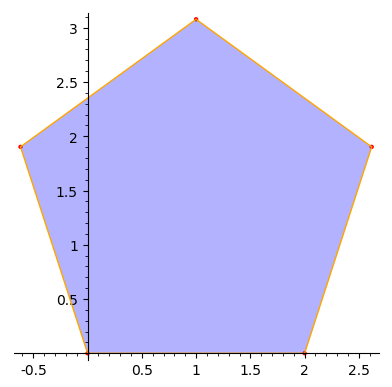

In [33]:
print(Pi5.polygon(0))
show(Pi5.polygon(0).plot())

The function `str_to_vect` takes a string `coset_rep` in 'R' and 'T' and applyies the inverse of the corresponding matrix in $\langle R, T\rangle$ to the vector $(2 \varphi, 0)$. When applied to a coset representative, this gives the holonomy of a long closed saddle connection on $\tilde D$.

In [34]:
phi = F((1+sqrt(5))/2)

def str_to_vect(coset_rep, index=0):
    # This is the holonomy of the saddle connection sigma_0.
    v_fin = vector([2*phi,0])
    for i in coset_rep:
        if i == 'T':
            v_fin = T.inverse()*v_fin
        elif i == 'R':
            v_fin = R.inverse()*v_fin
    return v_fin

The following function `preferred_vect` takes a vector $v$ obtained as above and outputs a vector of the form $R^k v$ pointed in a direction in $[0,\frac{3 \pi}{5})$ such that the corresponding saddle connection on $\Pi_5$ has a cylinder with equal holonomy on the left. This is the normalization used in Appendix C.

In [35]:
from flatsurf.geometry.surface_objects import SaddleConnection

def preferred_vect(v):
    sector0 = vector(F,[1,0])
    sector1 = vector(F,[cos(3*pi/5),sin(3*pi/5)])
    # Form the list of rotated images of v under powers of R
    # that point in directions with angle in [0, 3*pi/5].
    possible_vectors = []
    for i in range(10):
        w = R^i * v
        if det(matrix([sector0, w]))>=0 and det(matrix([w, sector1]))>0:
            possible_vectors.append(w)
    # Sanity check that there are three vectors in our list.
    assert len(possible_vectors) == 3
    # For each of these vectors, construct the corresponding saddle connection
    # on Pi5, and return the one with the short cylinder on the left.
    for j in range(3):
        w = possible_vectors[j]
        # Construct the saddle connection leaving vertex 0 of polygon 0
        # with direction w.
        sc = SaddleConnection(Pi5, (0,0), w)
        if sc.holonomy() == w:
            # At this point we know sc is a long saddle connection.
            start = sc.start_tangent_vector()
            end = sc.end_tangent_vector()
            # If we rotate the start tangent vector by 180 degrees
            # counterclockwise and we find a scalar multiple of the end
            # tangent vector, then we know the short cylinder is on the left.
            if sc.start_tangent_vector().counterclockwise_to(-w). \
                differs_by_scaling(sc.end_tangent_vector()):
                    return w

Now we form Table 3 of Appendix C.

In [36]:
# List index, holonomy vector, approximate length, 
# and approximate holonomy vector for each coset. 
sadd_conn_total = []
for coset_rep in traj_to_self_coset_list:
    vect = preferred_vect(str_to_vect(coset_rep))
    sadd_conn_total.append( (coset_rep, vect, vect.norm().n(digits=6), vect.n(digits=6)) )
# Sort by length:
sadd_conn_total_sort = sorted(sadd_conn_total, key=lambda x: x[2])

print('', 'Coset Rep','Exact Vector', 'Length of Trajectory','Vector of Trajectory')
# The following prints the Table 3 of the appendix.
for i in enumerate(sadd_conn_total_sort):
    print(str(i[0]+1) + ' & ' + \
          '$' + str(i[1][0]) + '$ & ' + \
          '$' + latex(i[1][1]) + '$ & ' + \
          str(i[1][2]) + ' & ' + \
          str(i[1][3]) + ' \\\\')

('', 'Coset Rep', 'Exact Vector', 'Length of Trajectory', 'Vector of Trajectory')
1 & $RRRTT$ & $ \left(-3 s^{2} + 12,\,-5 s^{3} + 19 s\right) $ & 16.2386 & (7.85410, 14.2128) \\
2 & $RRRTTRRT$ & $ \left(-21 s^{2} + 76,\,-5 s^{3} + 19 s\right) $ & 49.0816 & (46.9787, 14.2128) \\
3 & $RTTTRT$ & $ \left(-19 s^{2} + 72,\,-7 s^{3} + 25 s\right) $ & 49.1630 & (45.7426, 18.0171) \\
4 & $RRTRTTTT$ & $ \left(-16 s^{2} + 59,\,-33 s^{3} + 120 s\right) $ & 94.9181 & (36.8885, 87.4567) \\
5 & $RTRRTTRRRT$ & $ \left(-29 s^{2} + 106,\,-27 s^{3} + 99 s\right) $ & 98.0031 & (65.9230, 72.5173) \\
6 & $RRTTRTRRRT$ & $ \left(-30 s^{2} + 109,\,-27 s^{3} + 98 s\right) $ & 98.2417 & (67.5410, 71.3418) \\
7 & $RRTRRTTTT$ & $ \left(12 s^{2} - 41,\,-41 s^{3} + 148 s\right) $ & 110.117 & (-24.4164, 107.376) \\
8 & $RTRRTTTTT$ & $ \left(-18 s^{2} + 67,\,-39 s^{3} + 142 s\right) $ & 111.810 & (42.1246, 103.572) \\
9 & $RTRTRTT$ & $ \left(-23 s^{2} + 84,\,-39 s^{3} + 141 s\right) $ & 114.941 & (52.2148, 102.396) \

Now we sanity check our saddle connection combinatorial length formula. The following function evaluates the combinatorial length formula described in remark C.2. We compare the results of applying the formula to the combinatorial length computed by FlatSurf.

In [37]:
def combinatorial_length_of_long_sc(hol):
    a = hol[0][0]
    b = hol[0][2]
    c = hol[1][1]
    d = hol[1][3]
    assert hol[1] > 0
    if det(matrix(F,[hol,[cos(pi/5),sin(pi/5)]]))>0:
        return -b-c-4*d
    elif det(matrix(F,[hol,[cos(2*pi/5),sin(2*pi/5)]]))>0:
        return a+3*b-d-1
    else:
        assert det(matrix(F,[hol,[cos(3*pi/5),sin(3*pi/5)]]))>0
        return 2*c+6*d-1

error_count = 0
for i,data in enumerate(sadd_conn_total_sort):
    vect = data[1]
    sc = SaddleConnection(Pi5, (0,0), vect)
    traj = sc.trajectory()
    l = combinatorial_length_of_long_sc(sc.holonomy())
    if traj.combinatorial_length() != l:
        print("Saddle connection %s predicted combinatorial length is %s, but the actual length is %s." 
              % (i,l,traj.combinatorial_length()))
print("Found %s mistakes in the formula." % error_count)

Found 0 mistakes in the formula.


## Appendix D

We will find all saddle connections of length less than 622 and then analyze them.

In [38]:
L = 622

The following represents the indices of surfaces representing each of the coset used in Table 3. We order the collections to match the table.

In [39]:
sc_index_to_equivalence_class = []
for i in range(31):
    coset_rep = sadd_conn_total_sort[i][0]
    coset_index = index_of_phi_of_word(coset_rep)
    for equiv_class in equivalence_classes:
        if coset_index in equiv_class:
            sc_index_to_equivalence_class.append(equiv_class)
            break
sc_index_to_equivalence_class

[frozenset({25, 33, 48, 64, 90, 122, 168, 221, 299, 393}),
 frozenset({133, 135, 241, 243, 425, 427, 704, 708, 817, 1083}),
 frozenset({45, 86, 160, 285, 494, 671, 1034, 1434, 1658, 1702}),
 frozenset({202, 290, 361, 502, 610, 816}),
 frozenset({394, 660, 1021}),
 frozenset({390, 656, 827}),
 frozenset({356, 602, 951, 1704, 1759, 1974}),
 frozenset({366, 485, 618, 794, 971, 1190}),
 frozenset({97, 180, 319}),
 frozenset({145, 204, 261, 363, 459, 614, 762, 962, 967, 1002}),
 frozenset({571, 909, 1304, 1305, 1695}),
 frozenset({250, 439, 728, 1059, 1460, 1818}),
 frozenset({302, 518, 836, 1008, 1408, 1782}),
 frozenset({418, 692, 719, 1064, 1101, 1285, 1464, 1509, 1856, 1895}),
 frozenset({483, 792, 1186, 1601, 1861}),
 frozenset({1031, 1941}),
 frozenset({460, 611}),
 frozenset({1161, 1577}),
 frozenset({1275, 1666, 1675, 1831, 1960, 1964}),
 frozenset({1248, 1653, 1777, 1950, 2011, 2022}),
 frozenset({901, 1277, 1677}),
 frozenset({697, 807, 1070, 1203, 1472, 1621, 1836, 1917, 1932, 20

The union of all the sets in the list above is the collection of indices of surfaces with closed long horizontal saddle connections.

In [40]:
all_closed_indices = set()
for equiv_class in sc_index_to_equivalence_class:
    all_closed_indices = all_closed_indices.union(equiv_class)

The following is the generalized continued fraction algorithm applied to a vector.

In [41]:
# Let r denote R^-1 and t denote T^-1.
# Given a vector v representing the holonomy of a saddle connection,
# the following returns a word in r and t, which when viewed as a matrix
# carries v to either (2, 0) or (2*phi, 0).
# We return the pair consisting of the group element applied, 
# as a string in r and t and the resulting vector (2,0) or (2*phi, 0).
def vector_to_word(v):
    assert v[1] >= 0
    w = v
    word = ""
    while w[1] != 0:
        if det(matrix(F,[[cos(pi/5),sin(pi/5)],w])) >= 0:
            w = R^-1 * w
            word = "r" + word
        else:
            w = T^-1 * w
            word = "t" + word
    return (word, w)

Below we find all saddle connections of length less than $L$. Then we analyze them to figure out which coset the belong to and store them in a dictionary if they are shorter than any other closed saddle connection found so far that represents the same coset.

This is a long calculation which takes about 7 hours and is skipped by default. Set `do_long_calculation = True` to do the computation.

In [42]:
do_long_calculation = False

if do_long_calculation:
    # Obtain the saddle connections of length less than L:
    print("Finding all saddle connections of length less than %s leaving vertex 0 of polygon 0." % L)
    print("This will take approximately 75 minutes.")
    from datetime import datetime
    start = datetime.now()
    sc_list = Pi5.saddle_connections(L^2, initial_label=0, initial_vertex=0)
    end = datetime.now()
    print("Found %s saddle connections of length less than %s." % (len(sc_list), L))
    print("That calculation took %s seconds." % (end - start).total_seconds())
    # This will store the holonomies of the shortest 
    # saddle connections found for each coset:
    shortest = 31*[None]

    import sys
    print "Checking saddle connections:",
    sys.stdout.flush()
    progress = 0
    start = datetime.now()

    for i, sc in enumerate(sc_list):
        if progress < floor(100*i/len(sc_list)):
            # Give some feedback on progress made.
            progress = floor(100*i/len(sc_list))
            current = datetime.now()
            change = (current - start).total_seconds()
            expected = change*(len(sc_list)-i)/i
            print str(progress) + "% complete (" + str(floor(expected)) +" seconds remaining)",
            sys.stdout.flush()
        word, reduced_vector = vector_to_word(sc.holonomy())
        if reduced_vector != vector([2*phi,0]):
            # This is a short saddle connection.
            # Discard it!
            continue
        # Index of the translation cover of the dodecahedron:
        index = 1
        for letter in reversed(word):
            if letter == "r":
                # Perform the R^-1 action on surface indices
                index = rinv(index)
            if letter == "t":
                # Perform the T^-1 action on surface indices
                index = tinv(index)
        if index in all_closed_indices:
            # Run only if long horizontal saddle connections are closed
            for j in range(31):
                if index in sc_index_to_equivalence_class[j]:
                    # We belong to the j-th coset.
                    # Check if it is the first found for this coset or if it is 
                    # shorter than anything else found for this coset.
                    if shortest[j] is None or \
                        F(sc.holonomy().norm()^2) < F(shortest[j].norm()^2):
                            # Store the holonomy off.
                            shortest[j] = sc.holonomy()
                            break
else:
    # We give the result of the computation and then run some sanity checks.
    shortest = [ vector(F, (-6*s^2 + 23, -3*s^3 + 10*s)),      # 1
                 vector(F, (-21*s^2 + 76, -5*s^3 + 19*s)),     # 2
                 vector(F, (-22*s^2 + 78, -4*s^3 + 16*s)),     # 3
                 vector(F, (-36*s^2 + 131, -19*s^3 + 68*s)),   # 4
                 vector(F, (-42*s^2 + 154, -8*s^3 + 28*s)),    # 5
                 vector(F, (-43*s^2 + 156, -7*s^3 + 25*s)),    # 6
                 vector(F, (-48*s^2 + 176, -4*s^3 + 14*s)),    # 7
                 vector(F, (-42*s^2 + 153, -23*s^3 + 82*s)),   # 8
                 vector(F, (-46*s^2 + 166, -20*s^3 + 72*s)),   # 9
                 vector(F, (-52*s^2 + 183, -3*s^3 + 12*s)),    # 10
                 vector(F, (-63*s^2 + 232, -9*s^3 + 31*s)),    # 11
                 vector(F, (-70*s^2 + 253, -17*s^3 + 62*s)),   # 12
                 vector(F, (-72*s^2 + 261, -11*s^3 + 40*s)),   # 13
                 vector(F, (-90*s^2 + 327, -23*s^3 + 82*s)),   # 14
                 vector(F, (-92*s^2 + 332, -20*s^3 + 74*s)),   # 15
                 vector(F, (-111*s^2 + 408, -43*s^3 + 153*s)), # 16
                 vector(F, (-61*s^2 + 226, -5*s^3 + 17*s)),    # 17
                 vector(F, (-123*s^2 + 446, -17*s^3 + 61*s)),  # 18
                 vector(F, (-89*s^2 + 326, -13*s^3 + 45*s)),   # 19
                 vector(F, (-132*s^2 + 479, -19*s^3 + 68*s)),  # 20
                 vector(F, (-109*s^2 + 390, -13*s^3 + 49*s)),  # 21
                 vector(F, (-93*s^2 + 334, -19*s^3 + 71*s)),   # 22
                 vector(F, (-115*s^2 + 416, -39*s^3 + 141*s)), # 23
                 vector(F, (-130*s^2 + 473, -33*s^3 + 118*s)), # 24
                 vector(F, (-159*s^2 + 576, -13*s^3 + 47*s)),  # 25
                 vector(F, (-116*s^2 + 418, -6*s^3 + 22*s)),   # 26
                 vector(F, (-165*s^2 + 592, -11*s^3 + 41*s)),  # 27
                 vector(F, (-164*s^2 + 590, -34*s^3 + 126*s)), # 28
                 vector(F, (-152*s^2 + 556, -12*s^3 + 42*s)),  # 29
                 vector(F, (-143*s^2 + 522, -23*s^3 + 83*s)),  # 30
                 vector(F, (-272*s^2 + 984, -48*s^3 + 174*s))] # 31
    for i in range(31):
        word, reduced_vect = vector_to_word(shortest[i])
        assert reduced_vect == vector([2*phi,0])
        # Compute the index of the associated surface
        index = 1
        for letter in reversed(word):
            if letter == "r":
                # Perform the R^-1 action on surface indices
                index = rinv(index)
            if letter == "t":
                # Perform the T^-1 action on surface indices
                index = tinv(index)
        assert index in sc_index_to_equivalence_class[i]
        # Check that it is indeed non-strictly shorter than our coset representative.
        assert F(sadd_conn_total_sort[i][1].norm()^2) >= F(shortest[i].norm()^2)

In [43]:
# We use the following to help format the words in the Table 4.
def string_to_free_group_element(string):
    G.<R,T> = FreeGroup()
    g = G.one()
    for letter in string:
        if letter == "R":
            g = g*R
        else:
            g = g*T
    return g

Now we compare what we found to the lengths of holonomy vectors in Table 3. 

We form a new table only listing the the shorter trajectories. This is Table 4 of the appendix.

In [44]:
shortest_table = {}
for i in range(31):
    if shortest[i] is not None:
        if F(shortest[i].norm()^2) < F(sadd_conn_total_sort[i][1].norm()^2):
            v = shortest[i]
            word = vector_to_word(v)[0]
            coset_rep_inv = string_to_free_group_element(
                "".join(reversed(word.replace("r","R").replace("t","T"))))
            vect = preferred_vect(v)
            shortest_table[i] = (coset_rep_inv, vect, vect.norm().n(digits=6), 
                                vect.n(digits=6))
print('', 'Inverse of Coset Rep','Exact Vector', 'Length of Trajectory','Vector of Trajectory')
for i,data in shortest_table.items():
    print(str(i+1) + ' & ' + \
          '$\\big(' + str(data[0]).replace('*','') + '\\big)^{-1}$ & ' + \
          '$' + latex(data[1]) + '$ & ' + \
          str(data[2]) + ' & ' + \
          str(data[3]) + ' \\\\')

('', 'Inverse of Coset Rep', 'Exact Vector', 'Length of Trajectory', 'Vector of Trajectory')
10 & $\big(T^2(T^2R)^2\big)^{-1}$ & $ \left(-52 s^{2} + 183,\,-3 s^{3} + 12 s\right) $ & 111.521 & (111.138, 9.23305) \\
16 & $\big(TR^3T^3(TR^3)^2TR\big)^{-1}$ & $ \left(-62 s^{2} + 227,\,-89 s^{3} + 326 s\right) $ & 277.350 & (141.318, 238.647) \\
17 & $\big(T^2(T^2R)^2R^2\big)^{-1}$ & $ \left(-48 s^{2} + 174,\,-34 s^{3} + 126 s\right) $ & 142.196 & (107.666, 92.8855) \\
18 & $\big(T^2RT(RTR^2)^2\big)^{-1}$ & $ \left(-88 s^{2} + 319,\,-75 s^{3} + 272 s\right) $ & 279.518 & (197.387, 197.910) \\
19 & $\big(T^2RT(TR^3)^3\big)^{-1}$ & $ \left(-64 s^{2} + 234,\,-54 s^{3} + 198 s\right) $ & 205.478 & (145.554, 145.035) \\
20 & $\big(T(TR)^2R(RT)^2R^2\big)^{-1}$ & $ \left(-94 s^{2} + 341,\,-81 s^{3} + 294 s\right) $ & 300.613 & (211.095, 214.025) \\
21 & $\big(T^2RT^3R^3TR\big)^{-1}$ & $ \left(-109 s^{2} + 390,\,-13 s^{3} + 49 s\right) $ & 242.130 & (239.366, 36.4832) \\
22 & $\big(TRT^3(TR)^2R^2\b

Now we check our combinatorial length formula for our new list of saddle connections.

In [45]:
error_count = 0
for i,data in shortest_table.items():
    vect = data[1]
    sc = SaddleConnection(Pi5, (0,0), vect)
    traj = sc.trajectory()
    l = combinatorial_length_of_long_sc(sc.holonomy())
    if traj.combinatorial_length() != l:
        print("Saddle connection %s predicted combinatorial length is %s, but the actual length is %s." 
              % (i,l,traj.combinatorial_length()))
print("Found %s mistakes in the formula." % error_count)

Found 0 mistakes in the formula.
